In [1]:
import math
import os
import re
from pathlib import Path
import warnings

warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

line_pos = None

In [2]:
# os.chdir('..')
os.chdir(os.path.expanduser("~/nope/clm"))

In [77]:
# fig_pk_rope
# name, avg_len = "RoPE", 2048
# path, line_pos = Path("ckpts_arxiv/pass3/RoPE50k (test 4k)|Feb13_20-30-42"), 3
# fig_pk_yarn8k
# name, avg_len = "YaRN8k", 8192
# path, line_pos = Path("ckpts_arxiv/pass3/YaRN8k (test 16k)|Feb16_05-33-54"), 3
# fig_pk_yarn16k
# name, avg_len = "YaRN16k", 16384
# path, line_pos = Path("ckpts_arxiv/pass3/YaRN16k (test 32k)|Feb16_05-51-35"), 3
# fig_pk_nope
# name, avg_len = "NoPE", 2048
# path, line_pos = Path("ckpts_arxiv/pass3/NoPE50k (test 4k)|Feb13_20-31-51"), 3
# fig_pk_hs8k
# name, avg_len = "HS8k", 8192
# path, line_pos = Path("ckpts_arxiv/pass3/HS8k (test 16k)|Feb16_05-21-57"), 3
# fig_pk_hs16k
# name, avg_len = "HS16k", 16384
# path, line_pos = Path("ckpts_arxiv/pass3/HS16k (test 32k)|Feb16_05-52-30"), 3

In [87]:
# fig_pk_nope_relu0
# name, avg_len = "HS16k ReLU0", 16384
# path, line_pos = Path("ckpts/selected/tnl_hs_50k_18k/relu0_i1.7_st200_1e-1_sd271828/Feb14_11-58-07"), 4
# fig_pk_nope_i1
name, avg_len = "HS16k Default Init", 16384
path, line_pos = Path("ckpts/selected/tnl_hs_50k_18k/relu1_i1.0_st200_1e-1_sd1001/Feb14_22-45-11"), 4

In [88]:
df = pd.read_csv(path / "result.csv")
print(df)

     length depth  position  accuracy
0      1024    0%        55       0.7
1      1024   10%       146       0.9
2      1024   20%       263       1.0
3      1024   30%       366       0.9
4      1024   40%       454       0.8
..      ...   ...       ...       ...
155   16384   50%      8832       0.0
156   16384   60%     10523       0.0
157   16384   70%     12278       0.0
158   16384   80%     14032       0.0
159   16384   90%     15998       0.0

[160 rows x 4 columns]


Text(0.5, 1.0, 'HS16k Default Init acc 0.26')

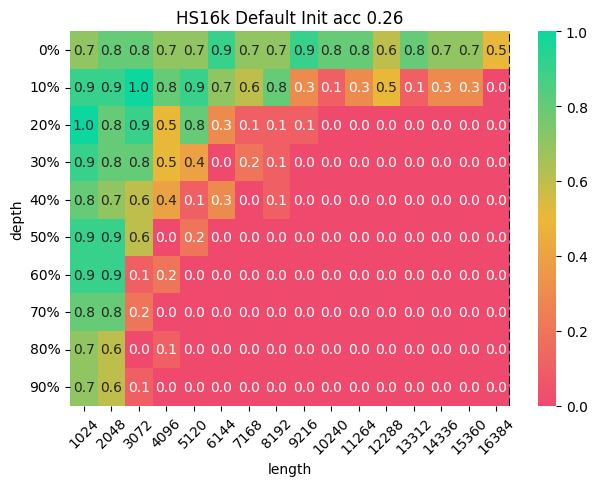

In [89]:
cmap = LinearSegmentedColormap.from_list("custom_cmap", ["#F0496E", "#EBB839", "#0CD79F"])
ax = sns.heatmap(
    df.pivot(index="depth", columns="length", values="accuracy"),
    fmt=".1f",
    cmap=cmap,
    annot=True,
    vmin=0,
    vmax=1,
)
line_idx = 2**line_pos
color = "black"  # FT length
ax.axvline(line_idx, color=color, linestyle="--")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.figure.tight_layout()
# plt.title(f"{name} (test {length_map[df['length'].max()]})");
avg = df[df["length"] <= avg_len]["accuracy"].mean()
plt.title(f"{name} acc {avg:.2f}")

In [90]:
ax.figure.savefig(os.path.join("logs", "fig.pdf"), bbox_inches="tight", pad_inches=0.0, dpi=1000)